In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
import os
import sys
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm



In [3]:
# I modified the data in excel, so I can have the year and the month in one column
data=pd.read_excel("Armenia_GDP.xlsx")

In [4]:
data.head()

,Date,Previous_m
0,01/2010,102.169439
1,02/2010,102.649660
2,03/2010,106.946553
3,04/2010,112.739064
4,05/2010,107.197163


In [5]:
#Create data index
data.set_index('Date',inplace=True)

In [6]:
data.head()

,Previous_m
Date,
01/2010,102.169439
02/2010,102.649660
03/2010,106.946553
04/2010,112.739064
05/2010,107.197163


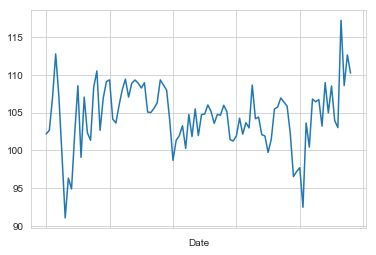

In [7]:
data['Previous_m'].plot()
plt.show()

In [8]:
# from the plot we can observe some seasonal patterns

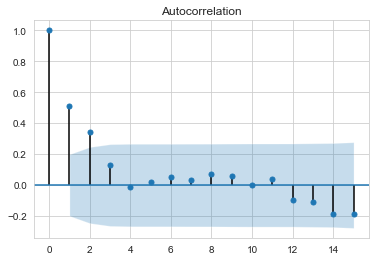

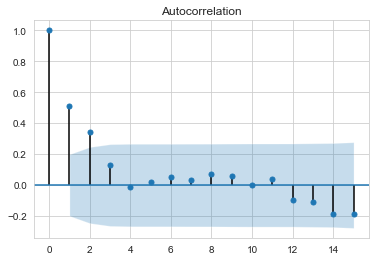

In [9]:
plot_acf(data,lags=15)

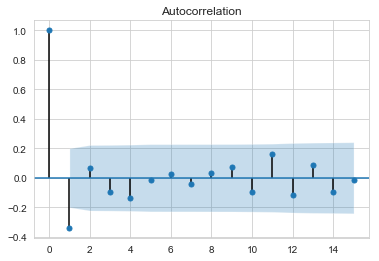

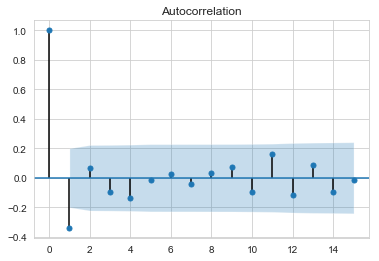

In [10]:
diff = data.diff(periods=1)
diff.dropna(inplace=True)
plot_acf(diff,lags=15)

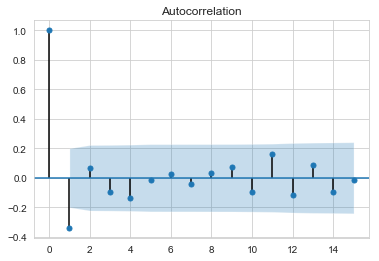

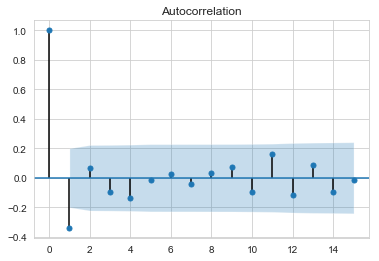

In [11]:
diff2 = data.diff(periods=2)
diff2.dropna(inplace=True)
plot_acf(diff,lags=15)

In [12]:
print (data.std())

Previous_m    4.197378
dtype: float64


In [13]:
print (diff.std())

Previous_m    4.113776
dtype: float64


In [14]:
print (diff2.std())

Previous_m    4.744623
dtype: float64


In [15]:
# no need to differentiate further, as std increases from second differencing

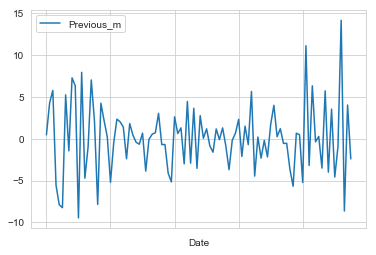

In [16]:
diff.plot()
plt.show()

## Identifying AR and MA signatures

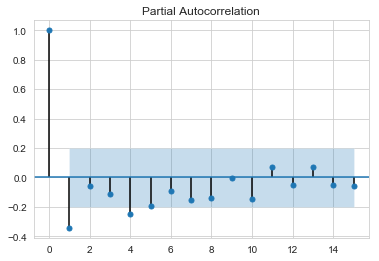

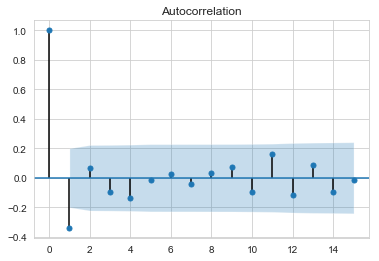

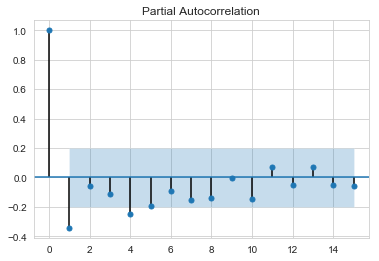

In [17]:
# plot ACF & PACF for determining AR & MA terms
plot_acf(diff,lags=15)
plot_pacf(diff,lags=15)

In [18]:
# ACF of the data displays a sharp cutoff & the lag-1 is negative, so it has an MA signature ("overdifferencing"), 
# so we can add an MA(1) term to the model, as 1 is the lag at which the ACF cuts off


## ARIMA

                             ARIMA Model Results                              
Dep. Variable:           D.Previous_m   No. Observations:                   96
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -264.626
Method:                       css-mle   S.D. of innovations              3.805
Date:                Sat, 09 Mar 2019   AIC                            535.253
Time:                        23:22:52   BIC                            542.946
Sample:                    02-01-2010   HQIC                           538.362
                         - 01-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0777      0.213      0.364      0.716      -0.340       0.495
ma.L1.D.Previous_m    -0.4562      0.135     -3.368      0.001      -0.722      -0.191
                    

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


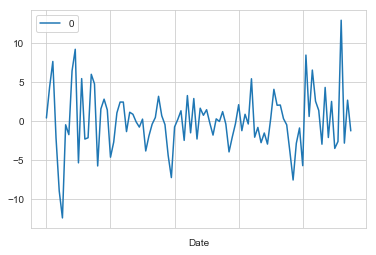

               0
count  96.000000
mean    0.019766
std     3.826710
min   -12.391203
25%    -2.137055
50%    -0.167671
75%     2.039764
max    12.914508


In [19]:
# fit model
model = ARIMA(data, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

In [20]:
# the model does performs well, as std decreased and it has significant MA coefficient

In [21]:
# check with autoarima
stepwise_fit = auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=False, d=1, D=1, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True)  

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1); AIC=528.965, BIC=539.222, Fit time=0.122 seconds
Fit ARIMA: order=(0, 1, 0); AIC=546.984, BIC=552.113, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=537.270, BIC=544.963, Fit time=0.024 seconds
Fit ARIMA: order=(0, 1, 1); AIC=535.253, BIC=542.946, Fit time=0.022 seconds


/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Fit ARIMA: order=(2, 1, 1); AIC=529.185, BIC=542.007, Fit time=0.252 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=530.713, BIC=546.099, Fit time=0.225 seconds
Total fit time: 0.677 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -260.482
Method:                       css-mle   S.D. of innovations              3.585
Date:                Sat, 09 Mar 2019   AIC                            528.965
Time:                        23:22:53   BIC                            539.222
Sample:                             1   HQIC                           533.111
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.027      0.384      0.702      -0.043       0.063
ar.L1.D.y      0.5356      0.089      6.030      0.000       0.362       0.710
ma.L1.D.y     -1.0000      0.037    -27.335      0.000      -1.072      -0.928
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8670           +0.0000j            1.8670            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

#### From the results summary, we can see that ARIMA (1,1,1) minimizes both AIC & BIC. ARIMA (2,1,1) provides the second most appealing results, however, it contradicts with my insight about ARIMA (0,1,1) and overall complicates the model. Therefore, if I would proceed with ARIMA, I will choose ARIMA (0,1,1) as itis more intuitive and has more or less similar scores of AIC & BIC.

## SARIMA

In [22]:
# try to include seasonality effect

my_order=(0,1,1) 
my_seasonal_order = (0, 1, 0, 12)
model_s=sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         Previous_m   No. Observations:                   97
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -256.281
Date:                            Sat, 09 Mar 2019   AIC                            516.562
Time:                                    23:22:53   BIC                            521.424
Sample:                                01-01-2010   HQIC                           518.516
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5358      0.083     -6.438      0.000      -0.699      -0.373
sigma2        26.0496      2.920   

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


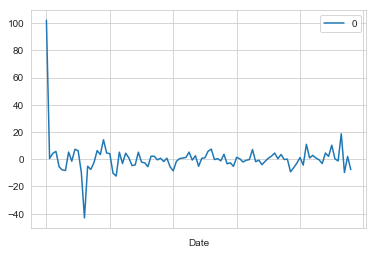

                0
count   97.000000
mean     0.655201
std     12.450125
min    -43.128425
25%     -3.136720
50%      0.314169
75%      3.428411
max    102.169439


In [23]:
#fit model
model_s_fit = model_s.fit(disp=0)
print(model_s_fit.summary())
# plot residual errors
residuals_s = DataFrame(model_s_fit.resid)
residuals_s.plot()
plt.show()
print(residuals_s.describe())

In [24]:
# the model provides mixed results, as overall AIC & BIC have decreased, yet std deviation increased significantly

In [25]:
# Therefore, I decided to do Grid Search, for finding the best parameters for SARIMA

### Grid Search SARIMA

In [26]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [27]:
def sarima_forecast(history, config):
    order, sorder, trend = config

    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=True, 
                    enforce_invertibility=False)
    model_fit = model.fit(disp=0)
# make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]


In [28]:
# split a dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [29]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
        return sqrt(mean_squared_error(actual, predicted))

In [30]:
# walk-forward validation for data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error


In [31]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)


In [32]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
        # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores


In [33]:
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1]
    d_params = [0, 1]
    q_params = [0, 1]
    t_params = ['n','c','t','ct']
    P_params = [0, 1]
    D_params = [0, 1]
    Q_params = [0, 1]
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                cfg = [(p,d,q), (P,D,Q,12), t]
                                models.append(cfg)
    return models

In [34]:
if __name__ == '__main__':
    data = data.as_matrix()
    # data split
    n_test = 4
    # model configs
    cfg_list = sarima_configs()
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 112.188
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 14.095
 > Model[[(0, 0, 0), (1, 1, 0, 12), 'n']] 12.773
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 9.606
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 63.360
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'c']] 8.461
 > Model[[(0, 0, 0), (0, 1, 0, 12), 'c']] 13.716
 > Model[[(0, 0, 0), (1, 1, 1, 12), 'n']] 9.919
 > Model[[(0, 0, 0), (0, 1, 1, 12), 'c']] 9.848
 > Model[[(0, 0, 0), (0, 0, 1, 12), 'c']] 8.141
 > Model[[(0, 0, 0), (0, 0, 0, 12), 't']] 45.247
 > Model[[(0, 0, 0), (1, 1, 0, 12), 'c']] 12.575
 > Model[[(0, 0, 0), (1, 0, 1, 12), 'n']] 10.975
 > Model[[(0, 0, 0), (0, 0, 1, 12), 't']] 21.405
 > Model[[(0, 0, 0), (0, 1, 0, 12), 't']] 13.728
 > Model[[(0, 0, 0), (1, 1, 1, 12), 'c']] 10.037
 > Model[[(0, 0, 0), (1, 0, 1, 12), 'c']] 8.403
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'ct']] 8.832
 > Model[[(0, 0, 0), (1, 1, 0, 12), 't']] 12.639
 > Model[[(0, 0, 0), (0, 1, 1, 12), 't']] 10.058
 > Model[[(0, 0, 0), (0, 

 > Model[[(1, 1, 0), (0, 1, 1, 12), 'n']] 8.372
 > Model[[(1, 1, 0), (1, 0, 0, 12), 'n']] 7.405
 > Model[[(1, 0, 1), (0, 1, 1, 12), 'ct']] 8.682
 > Model[[(1, 0, 1), (1, 1, 0, 12), 'ct']] 10.648
 > Model[[(1, 1, 0), (1, 1, 0, 12), 'n']] 10.191
 > Model[[(1, 1, 0), (0, 0, 0, 12), 'c']] 7.392
 > Model[[(1, 1, 0), (1, 0, 1, 12), 'n']] 7.162
 > Model[[(1, 1, 0), (0, 1, 0, 12), 'c']] 12.152
 > Model[[(1, 1, 0), (1, 1, 1, 12), 'n']] 8.569
 > Model[[(1, 1, 0), (0, 0, 1, 12), 'c']] 7.430
 > Model[[(1, 1, 0), (1, 0, 0, 12), 'c']] 7.421
 > Model[[(1, 1, 0), (0, 1, 1, 12), 'c']] 8.475
 > Model[[(1, 1, 0), (1, 0, 1, 12), 'c']] 7.183
 > Model[[(1, 1, 0), (1, 1, 0, 12), 'c']] 10.265
 > Model[[(1, 1, 0), (0, 0, 0, 12), 't']] 7.461
 > Model[[(1, 0, 1), (1, 1, 1, 12), 'ct']] 8.888
 > Model[[(1, 1, 0), (0, 1, 0, 12), 't']] 12.284
 > Model[[(1, 1, 0), (1, 1, 1, 12), 'c']] 8.695
 > Model[[(1, 1, 0), (0, 0, 1, 12), 't']] 7.485
 > Model[[(1, 1, 0), (1, 0, 0, 12), 't']] 7.481
 > Model[[(1, 1, 0), (1, 1, 0, 1

In [35]:
# Grid Search results
my_order1=(0,1,1) 
my_seasonal_order1 = (1, 0, 1, 12)
model_s1=sm.tsa.statespace.SARIMAX(data, order=my_order1, seasonal_order=my_seasonal_order1)

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   97
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -264.052
Date:                            Sat, 09 Mar 2019   AIC                            536.104
Time:                                    23:41:27   BIC                            546.361
Sample:                                         0   HQIC                           540.250
                                             - 97                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4207      0.082     -5.120      0.000      -0.582      -0.260
ar.S.L12       0.3611      0.972   

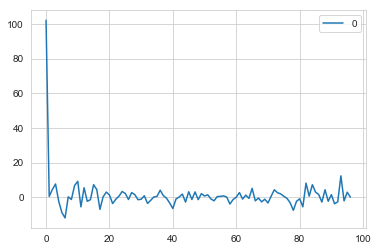

                0
count   97.000000
mean     1.204777
std     11.030314
min    -11.965722
25%     -2.086202
50%      0.139407
75%      2.143339
max    102.169439


In [36]:
#fit model
model_s_fit1 = model_s1.fit()
print(model_s_fit1.summary())
# plot residual errors
residuals_s1 = DataFrame(model_s_fit1.resid)
residuals_s1.plot()
plt.show()
print(residuals_s1.describe())

In [37]:
#trying to forecast GDP for the next 6 months
model_s_fit1.forecast(steps=3)

array([110.09337062, 110.05507055, 110.53527835])